In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

labels= pd.read_csv("train_master.tsv", sep="\t")
master = pd.read_csv("label_master.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None, sep=",")

train_images = []
for fname in labels["file_name"]:
    path = "./train/" + fname
    img = io.imread(path)
    train_images.append(img)
train_images = np.array(train_images)
print(type(train_images), train_images.shape)

test_images = []
for fname in sample[0]:
    path = "./test/" + fname
    img = io.imread(path)
    test_images.append(img)
test_images = np.array(test_images )
print(type(test_images ), test_images.shape)

train_images = train_images / 255
test_images = test_images / 255

y = labels["label_id"]

y_categorical = utils.to_categorical(y)
y_categorical

X_con_image, X_ver_image = np.split(train_images, [40000])
y_con_label, y_ver_label = np.split(y_categorical, [40000])

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())

model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=["accuracy"])

batch_size=32
epochs=10

history = model.fit(X_con_image, y_con_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_ver_image, y_ver_label))

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 541s 14ms/step - loss: 2.6235 - accuracy: 0.2051 - val_loss: 2.4762 - val_accuracy: 0.2455
Epoch 2/20
40000/40000 [==============================] - 554s 14ms/step - loss: 2.3361 - accuracy: 0.2840 - val_loss: 2.2789 - val_accuracy: 0.2927
Epoch 3/20
40000/40000 [==============================] - 567s 14ms/step - loss: 2.2027 - accuracy: 0.3205 - val_loss: 2.2103 - val_accuracy: 0.3193
Epoch 4/20
40000/40000 [==============================] - 541s 14ms/step - loss: 2.1092 - accuracy: 0.3444 - val_loss: 2.2540 - val_accuracy: 0.3006
Epoch 5/20
40000/40000 [==============================] - 506s 13ms/step - loss: 2.0413 - accuracy: 0.3671 - val_loss: 2.0895 - val_accuracy: 0.3447
Epoch 6/20
40000/40000 [==============================] - 468s 12ms/step - loss: 1.9819 - accuracy: 0.3841 - val_loss: 

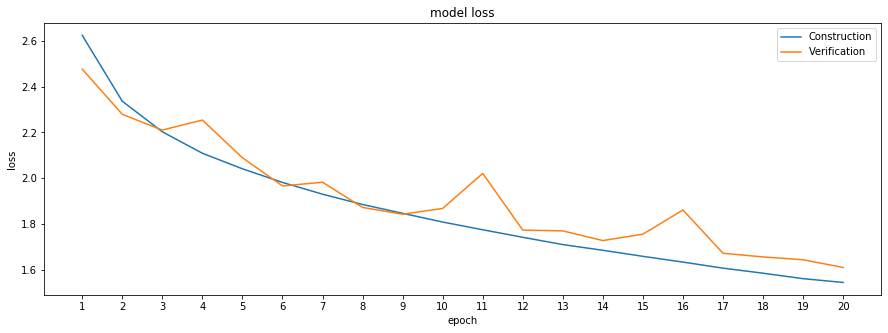

In [5]:
def learning_plot(history, epochs):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    plt.plot(range(1,epochs+1), history.history['loss'])
    plt.plot(range(1,epochs+1), history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('loss')
    plt.legend(['Construction', 'Verification'], loc='upper right')
    plt.show()
    
learning_plot(history,epochs)

In [6]:
print(model.evaluate(X_ver_image ,y_ver_label))

10000/10000 [==============================] - 24s 2ms/step
[1.6109882419586181, 0.5016999840736389]


In [ ]:
pred = model.predict(test_images)

pred = pred.argmax(axis=1)
print(pred)

sample[1] = pred
sample.to_csv("submit9.csv", sep=",", index=None, header=None)